In [61]:
'''`
        https://github.com/ageron/handson-ml2/blob/master/01_the_machine_learning_landscape.ipynb
'''

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [62]:
# Load the data
oecd_bli = pd.read_csv("BLI_17012024134701846.csv", thousands=',')
gdp_per_capita = pd.read_csv("API_NY.GDP.PCAP.CD_DS2_en_csv_v2_6298251.csv",
                             thousands=',')
# oecd_bli.head()
gdp_per_capita.head()

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26940.264114,28419.264534,28449.712946,29329.081747,30918.483584,31902.809818,24008.127822,29127.759384,33300.838819,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,141.385955,144.342434,148.774835,157.047580,166.849791,177.769086,...,1725.332959,1554.167299,1444.003514,1625.286236,1558.307482,1507.982881,1355.805923,1545.613215,1644.062829,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,...,626.512930,566.881133,523.053012,526.140801,492.090632,497.741429,512.055098,355.777826,NaN,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.053706,112.128417,117.814663,122.370114,130.700278,137.301801,...,2248.316255,1882.264038,1648.762676,1590.277754,1735.374911,1812.446822,1688.075575,1766.943618,1785.312219,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5011.984412,3217.339244,1809.709377,2439.374441,2540.508878,2191.347764,1450.905112,1927.474078,3000.444231,NaN


In [63]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2022": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

# Prepare the data


country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
country_stats.head()


X = np.c_[country_stats["GDP per capita"]]
y=np.c_[country_stats["Life satisfaction"]]

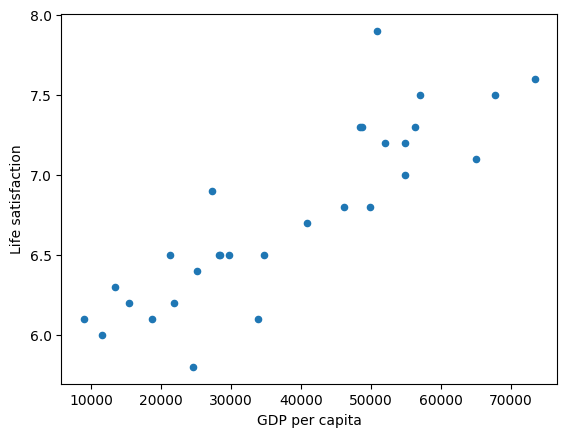

In [64]:
# Visualize the data
country_stats.plot(kind="scatter",x="GDP per capita",y="Life satisfaction")
plt.show()

Using Linear Regression         

In [65]:
# Select a linear model
import sklearn.linear_model as skl_linear
model1= skl_linear.LinearRegression()

In [66]:
# Train the model

model1.fit(X,y)

LinearRegression()

In [67]:
# Make Predictions for a country not present in oecd data say for cyprus

X_new =[[33000]] # cyprus per capita gdp
print (model1.predict(X_new))

[[6.61264081]]


Using K-Nearest Neighbors

In [ ]:
import sklearn.neighbors as skl_neighbors
model2 =skl_neighbors.KNeighborsRegressor(n_neighbors=3)